<a href="https://colab.research.google.com/github/EitanBakirov/Economics-Data-Science/blob/main/Web_Scraping_and_APIs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Web Scraping and APIs for Data Scientists

### Motivation

In the world of data science, being able to get and use data from the web is very important. Two key methods that help data scientists do this are web scraping and APIs (Application Programming Interfaces). This notebook is a complete guide for beginners, showing how to gather useful data from websites and online services. Whether you need data for research, to build a dataset for machine learning, or to automate repetitive tasks, learning web scraping and APIs will be very helpful. With practical examples, pictures, and clear steps, this guide will teach you the basics and get you started in the data-rich world of the web.

### Overview of Web Scraping and APIs

- **Web Scraping**: Web scraping is a technique used to extract data from websites. It involves fetching the HTML of a webpage and then parsing it to find the necessary information. This is useful when there is no API available, or when the data you need is only displayed on a webpage.
  - **Use Cases**: Gathering product information from e-commerce sites, collecting social media posts, extracting news articles, etc.
  - **Common Tools**: BeautifulSoup, Scrapy, Selenium






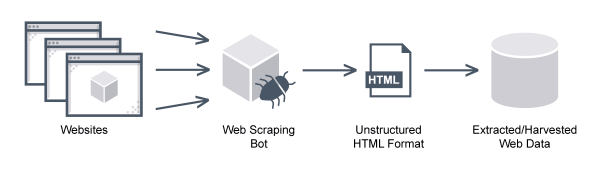

- **APIs**: An API is a set of rules and protocols that allows different software applications to communicate with each other. Many websites and services provide APIs that allow you to programmatically request and retrieve data.
  - **Use Cases**: Accessing structured data from services like Spotify, Twitter (X), weather information, stock prices, etc.
  - **Common Tools**: Requests library, Postman, various language-specific libraries

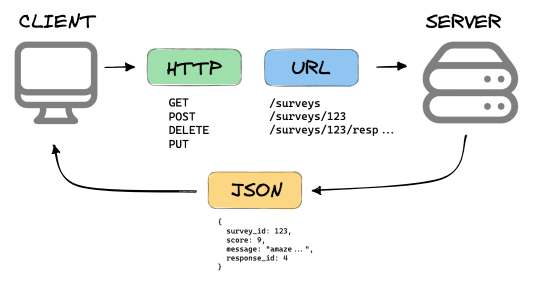

### Importance in Data Science

Web scraping and APIs are essential skills for data scientists for several reasons:

1. **Data Availability**: Much of the data needed for analysis, model building, or business intelligence is available on the web.
2. **Automation**: These techniques allow for the automated collection of large datasets, saving time and effort compared to manual data collection.
3. **Customization**: By using web scraping and APIs, you can tailor the data collection process to your specific needs, gathering only the information relevant to your project.
4. **Integration**: Combining data from multiple sources (both scraped data and API data) can provide a more comprehensive dataset for deeper insights and more robust models.

With this understanding, let's dive into setting up our environment and getting started with web scraping and APIs.

# Web Scraping



## What is Web Scraping?

Web scraping is a technique used to extract data from websites. It involves fetching the HTML of a webpage and then parsing it to find the necessary information. This is useful when there is no API available, or when the data you need is only displayed on a webpage.



### Ethical Considerations and Legal Aspects
TODO Maybe move down...
Before you start web scraping, it’s important to consider the ethical and legal implications:
- **Respect Website Terms of Service**: Always check a website’s terms of service to ensure you are not violating any rules.
- **Be Polite**: Avoid making too many requests in a short period. Use delays between requests to prevent overloading the server.
- **Use an API if Available**: If a website provides an API, use it instead of scraping. APIs are designed for data access and are often more efficient and reliable. (we will explore APIs later)




## Basic Concepts



Before diving into practical web scraping, there are several concepts you should be familiar with in order to succeed in scraping data from webpages.

### HTML Structure

Web pages are structured using HTML (HyperText Markup Language). Understanding the basic structure of HTML is crucial for web scraping.

Here's a simple example of an HTML structure:

```html
<!DOCTYPE html>
<html>
<head>
    <title>Sample Page</title>
</head>
<body>
    <h1>Welcome to the Sample Page</h1>
    <p>This is a sample paragraph.</p>
    <div class="content">
        <p>More content here.</p>
    </div>
</body>
</html>
```

Let's take a look at a simple webpage:<br>
https://phet-dev.colorado.edu/html/build-an-atom/0.0.0-3/simple-text-only-test-page.html

As you can see, an HTML webpage is constructed of tags '<>' which are the base of this language.

Some of the basic tags most webpages consist of:
- `<!DOCTYPE html>`: Declares the document type and version of HTML.
- `<html>`: The root element that encompasses all other HTML elements.
- `<head>`: Contains meta-information about the document, such as its title and links to stylesheets.
- `<title>`: Sets the title of the webpage, which appears in the browser tab.
- `<body>`: Contains the content of the HTML document that is displayed to the user.
- `<h1>`: Represents a top-level heading. There are six levels of headings (`<h1>` to `<h6>`), with `<h1>` being the highest.
- `<p>`: Defines a paragraph of text.
- `<a>`: Creates a hyperlink. The `href` attribute specifies the URL of the link.
- `<img>`: Embeds an image. The `src` attribute specifies the path to the image, and the `alt` attribute provides alternative text for the image.
- `<ul>`: Creates an unordered (bulleted) list.
- `<li>`: Defines a list item within a list. Used inside both `<ul>` (unordered list) and `<ol>` (ordered list).
- `<ol>`: Creates an ordered (numbered) list.

Also, as seen before, each tag must be closed after used, for example:
```html
<title>Sample Page</title>
```

To see the HTML code of a webpage you can right-click anywhere on the screen and choose "Inspect" and the code will show up on the side of the page:

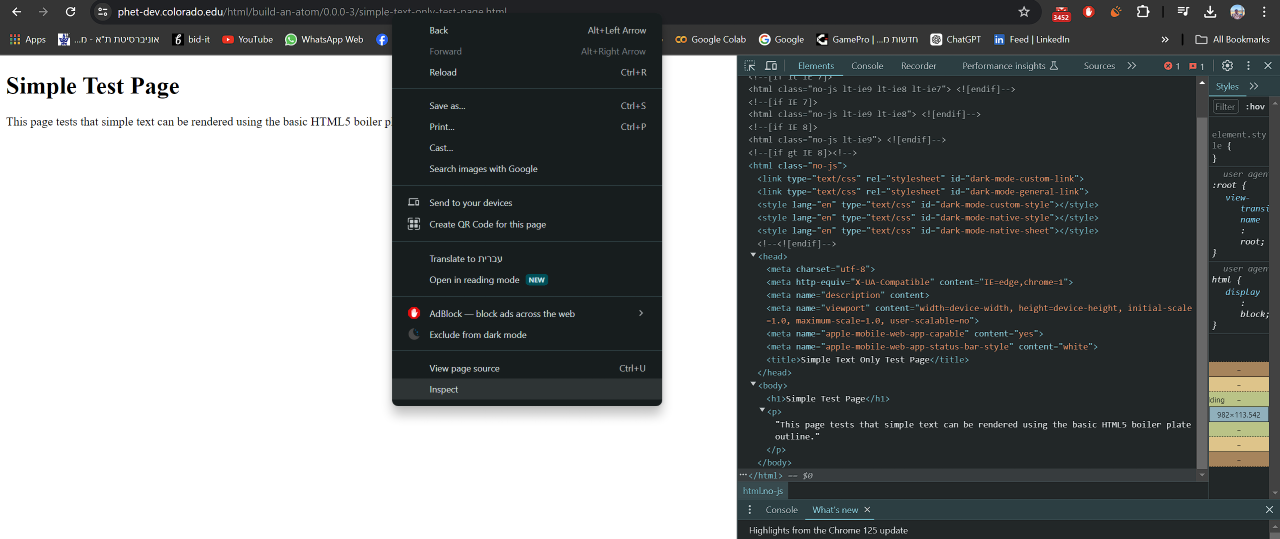

We can see all the text shown in the webpage is between the tags we have just learnt.

### CSS



When it comes to web scraping, understanding CSS is important because it helps you to navigate and extract the content you need from web pages.
<br>
<br>

CSS (Cascading Style Sheets) is a stylesheet language used to describe the presentation of a document written in HTML or XML. It controls the layout and appearance of web pages, enabling web designers to separate content from design.

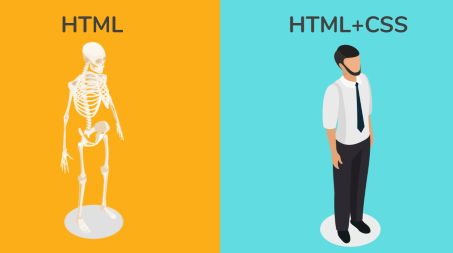

Now that we understand CSS, let's explore CSS selectors for web scraping. They help us target specific HTML elements by type, class, ID, or attributes, making data extraction precise and efficient. CSS selectors simplify validation and integrate smoothly with scraping libraries, automating content retrieval effectively.

#### Basic CSS Selectors

CSS (Cascading Style Sheets) selectors are used to select and style HTML elements.

- **Element Selector**: Selects all elements of a given type. For example, `p` selects all `<p>` elements.
- **Class Selector**: Selects all elements with a given class. For example, `.classname` selects all elements with `class="classname"`.
- **ID Selector**: Selects the element with a given ID. For example, `#idname` selects the element with `id="idname"`.
- **Attribute Selector**: Selects elements with a specific attribute. For example, `a[href="https://example.com"]` selects all `<a>` elements with `href="https://example.com"`.


### Tools and Libraries for Web Scraping

When diving into the realm of web scraping, there are numerous approaches to achieve the same goal. Web scraping can be accomplished through dedicated applications, browser extensions, and code libraries.

Let's explore a few tools that enable this process:

### 1. Dedicated Applications

- **ParseHub**: A web-based application that simplifies web scraping by providing a visual interface for data extraction.
- **Import.io**: Another web-based tool that allows users to create web scrapers without writing code.
- **Octoparse**: A cloud-based platform that offers a user-friendly interface for scraping data from websites.

### 2. Browser Extensions

- **Web Scraper (Chrome extension)**: A popular extension that enables users to extract data from websites directly within their Chrome browser.

### 3. Code Libraries

#### <u>Python</u>
- **BeautifulSoup**: A powerful library for parsing HTML/XML documents, making it easier to navigate and extract data.
- **Scrapy**: A comprehensive web scraping framework that provides a high-level API for extracting data from websites.
- **Selenium**: A tool primarily used for browser automation but can also be employed for web scraping, particularly for JavaScript-heavy websites.

#### <u>JavaScript/Node.js</u>
- **Puppeteer**: A Node.js library for controlling a headless Chrome browser, enabling web scraping of dynamic and JavaScript-rendered content.
- **Cheerio**: A jQuery-like library for parsing and manipulating HTML/XML data within Node.js applications.

### 4. Command-Line Tools</u>
- **cURL**: A versatile command-line tool for transferring data, supporting multiple protocols, though additional parsing tools are often needed.

- **Wget**: A simple tool for non-interactive downloading of web content, good for basic scraping tasks or downloading entire websites.

<br>

These tools offer diverse approaches to web scraping, catering to various skill levels and project requirements. Whether you prefer a visual interface, browser-based solution, or coding libraries, there are options available to extract data from websites efficiently.

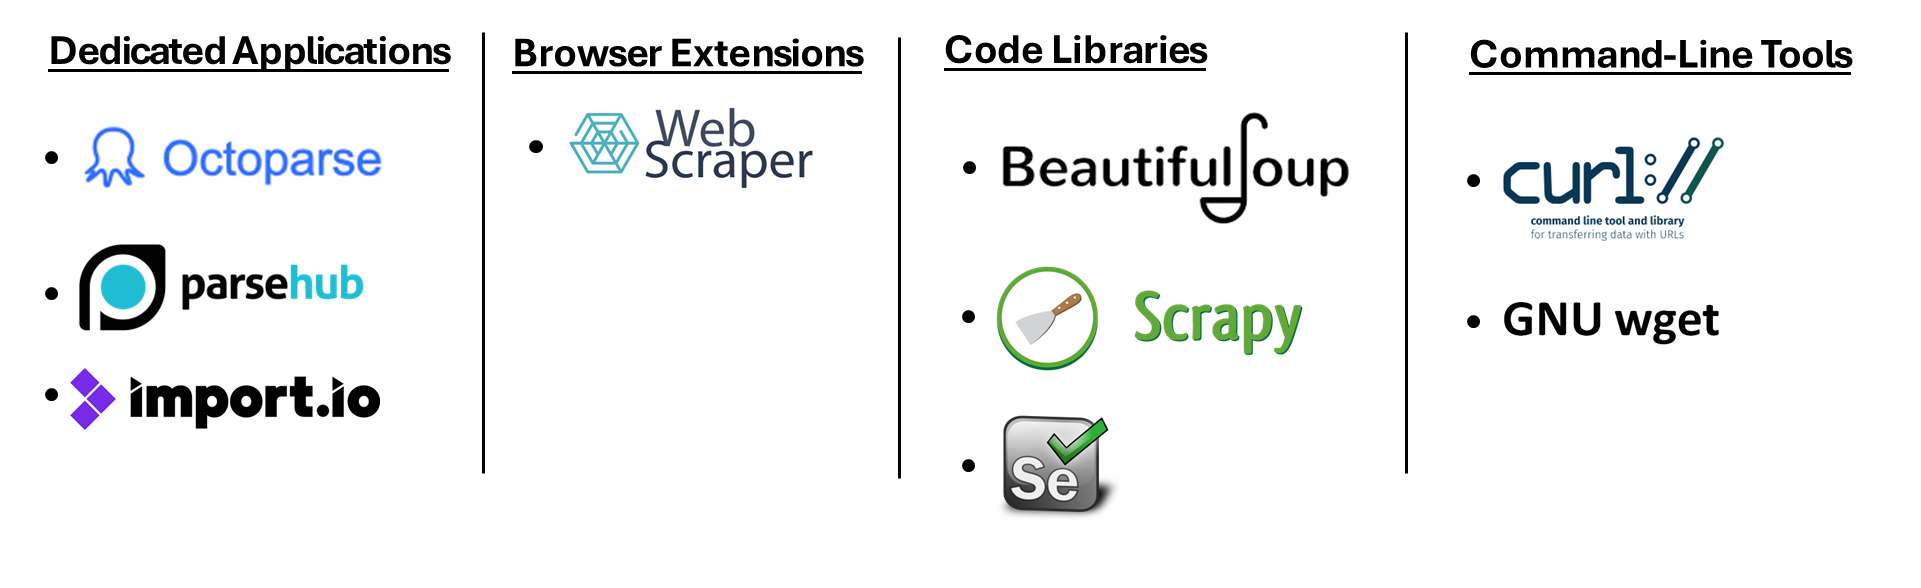

Since this is a beginner's guide to web scraping in Python, we'll focus on **<u>Beautiful Soup</u>**. This powerful and user-friendly library is perfect for parsing HTML and XML documents, making it easy for beginners to extract data from web pages effectively. By concentrating on Beautiful Soup, we can simplify the learning process and build a strong foundation in web scraping.

## Web Scraping using BeautifulSoup Library

Before we dive into web scraping, we need to set up our environment by installing some essential libraries. These libraries will help us fetch and process data from the web.

The main libraries we will use are:
- **BeautifulSoup**: For parsing HTML and extracting data from web pages.
- **Requests**: For making HTTP requests to web servers.
- **Pandas**: For data manipulation and analysis.

Let's install these libraries.

In [ ]:
# Installing necessary libraries
!pip install beautifulsoup4
!pip install requests
!pip install pandas

Let's start by verifying the installation of our libraries and exploring a simple example.

In [ ]:
# Importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Verifying the installations
print("Libraries installed and ready to use!")

Libraries installed and ready to use!


### Basic BeautifulSoup commands

When web scraping with BeautifulSoup, several basic commands and steps are typically involved to extract data from a webpage.

#### Fetch the Webpage Content

Use the `requests` library to get the content of the webpage.

```python
import requests

url = 'http://example.com'
response = requests.get(url)
```

#### Parse the Webpage Content

Use BeautifulSoup to parse the HTML content.

```python
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.content, 'html.parser')
```

#### Find Elements

Use various BeautifulSoup methods to find elements in the parsed HTML.

- **Find a Single Element**: `find()`

  ```python
  title = soup.find('h1')  # Find the first <h1> tag
  ```

- **Find Multiple Elements**: `find_all()`

  ```python
  links = soup.find_all('a')  # Find all <a> tags (links)
  ```

- **Find Elements with Specific Attributes**: `find()` or `find_all()` with attributes

  ```python
  nav_links = soup.find_all('a', class_='nav-link')  # Find all <a> tags with class 'nav-link'
  ```

#### Extract Data

Extract text or attributes from the found elements.

- **Extract Text**:

  ```python
  title_text = title.get_text()
  ```

- **Extract Attributes**:

  ```python
  link_urls = [link['href'] for link in links if 'href' in link.attrs]
  ```

### Simple HTML Parsing with BeautifulSoup
Let's start with a basic example of using BeautifulSoup to parse HTML and extract data.

Returning back to our previous example site:<br>
https://phet-dev.colorado.edu/html/build-an-atom/0.0.0-3/simple-text-only-test-page.html

Implementing what we have just learnt:

In [ ]:
# Fetch the webpage
url = 'https://phet-dev.colorado.edu/html/build-an-atom/0.0.0-3/simple-text-only-test-page.html'
# url = 'http://web.simmons.edu/~grovesd/comm244/class/html-testing.html'
# url = 'https://github.com/dashboard'
# url = 'http://example.com'
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

print(soup)

<!DOCTYPE html>

<!-- Build an Atom using Easel for the Scene Graph Library -->
<!--[if lt IE 7]>
<html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>
<html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>
<html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="" name="description"/>
<meta content="width=device-width, height=device-height, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport">
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="white" name="apple-mobile-web-app-status-bar-style"/>
<title>Simple Text Only Test Page</title>
</meta></head>
<body>
<h1>Simple Test Page</h1>
<p>This page tests that simple text can be rendered using the basic HTML5 boiler plate outline.</p>
</body>
</html>



With the object 'soup' being printed we can see that all it contains is the whole HTML document in its code form.

Let's use some of its functions:

In [ ]:
full_page_text = soup.get_text()

print('Full Page Text:', full_page_text)

Full Page Text: 





 







Simple Text Only Test Page


Simple Test Page
This page tests that simple text can be rendered using the basic HTML5 boiler plate outline.





As you can see all the text in the chosen webpage has been parsed. But there is a lot of blank space, these are the result of newline characters in the HTML document’s text.

Let's see more of the commands we have just learnt:

In [ ]:
# Extract the title of the page
title = soup.title.string
print('Page Title:', title)

# Extract all headers (h1, h2, h3, h4, h5, h6)
headers = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
for i, header in enumerate(headers, 1):
    print(f'{header.name.upper()} {i}:', header.text)

# Extract all paragraphs
paragraphs = soup.find_all('p')
for i, p in enumerate(paragraphs, 1):
    print(f'Paragraph {i}:', p.text)

Page Title: Simple Text Only Test Page
H1 1: Simple Test Page
Paragraph 1: This page tests that simple text can be rendered using the basic HTML5 boiler plate outline.


Now we got to fetch only the desired HTML tags and print them nicely.

Most of the webpages in the web are more advanced than that and finding what we wish may seem to be a more complicated thing.



## Advanced Web Scraping

Let's examine one like that:<br>
https://realpython.github.io/fake-jobs/

This Fake Python Jobs site hosts mock job listings, providing a safe environment for web scraping practice. Our goal is to develop a web scraper that extracts Python software developer job listings from this site. We'll parse the HTML to gather relevant data and filter the listings by specific keywords.

With some inspecting we can find the exact HTML tag that contains the name of a specific job. Also, after looking at some more jobs we see that this is a repetitive structure and maybe with some code we can extract these.

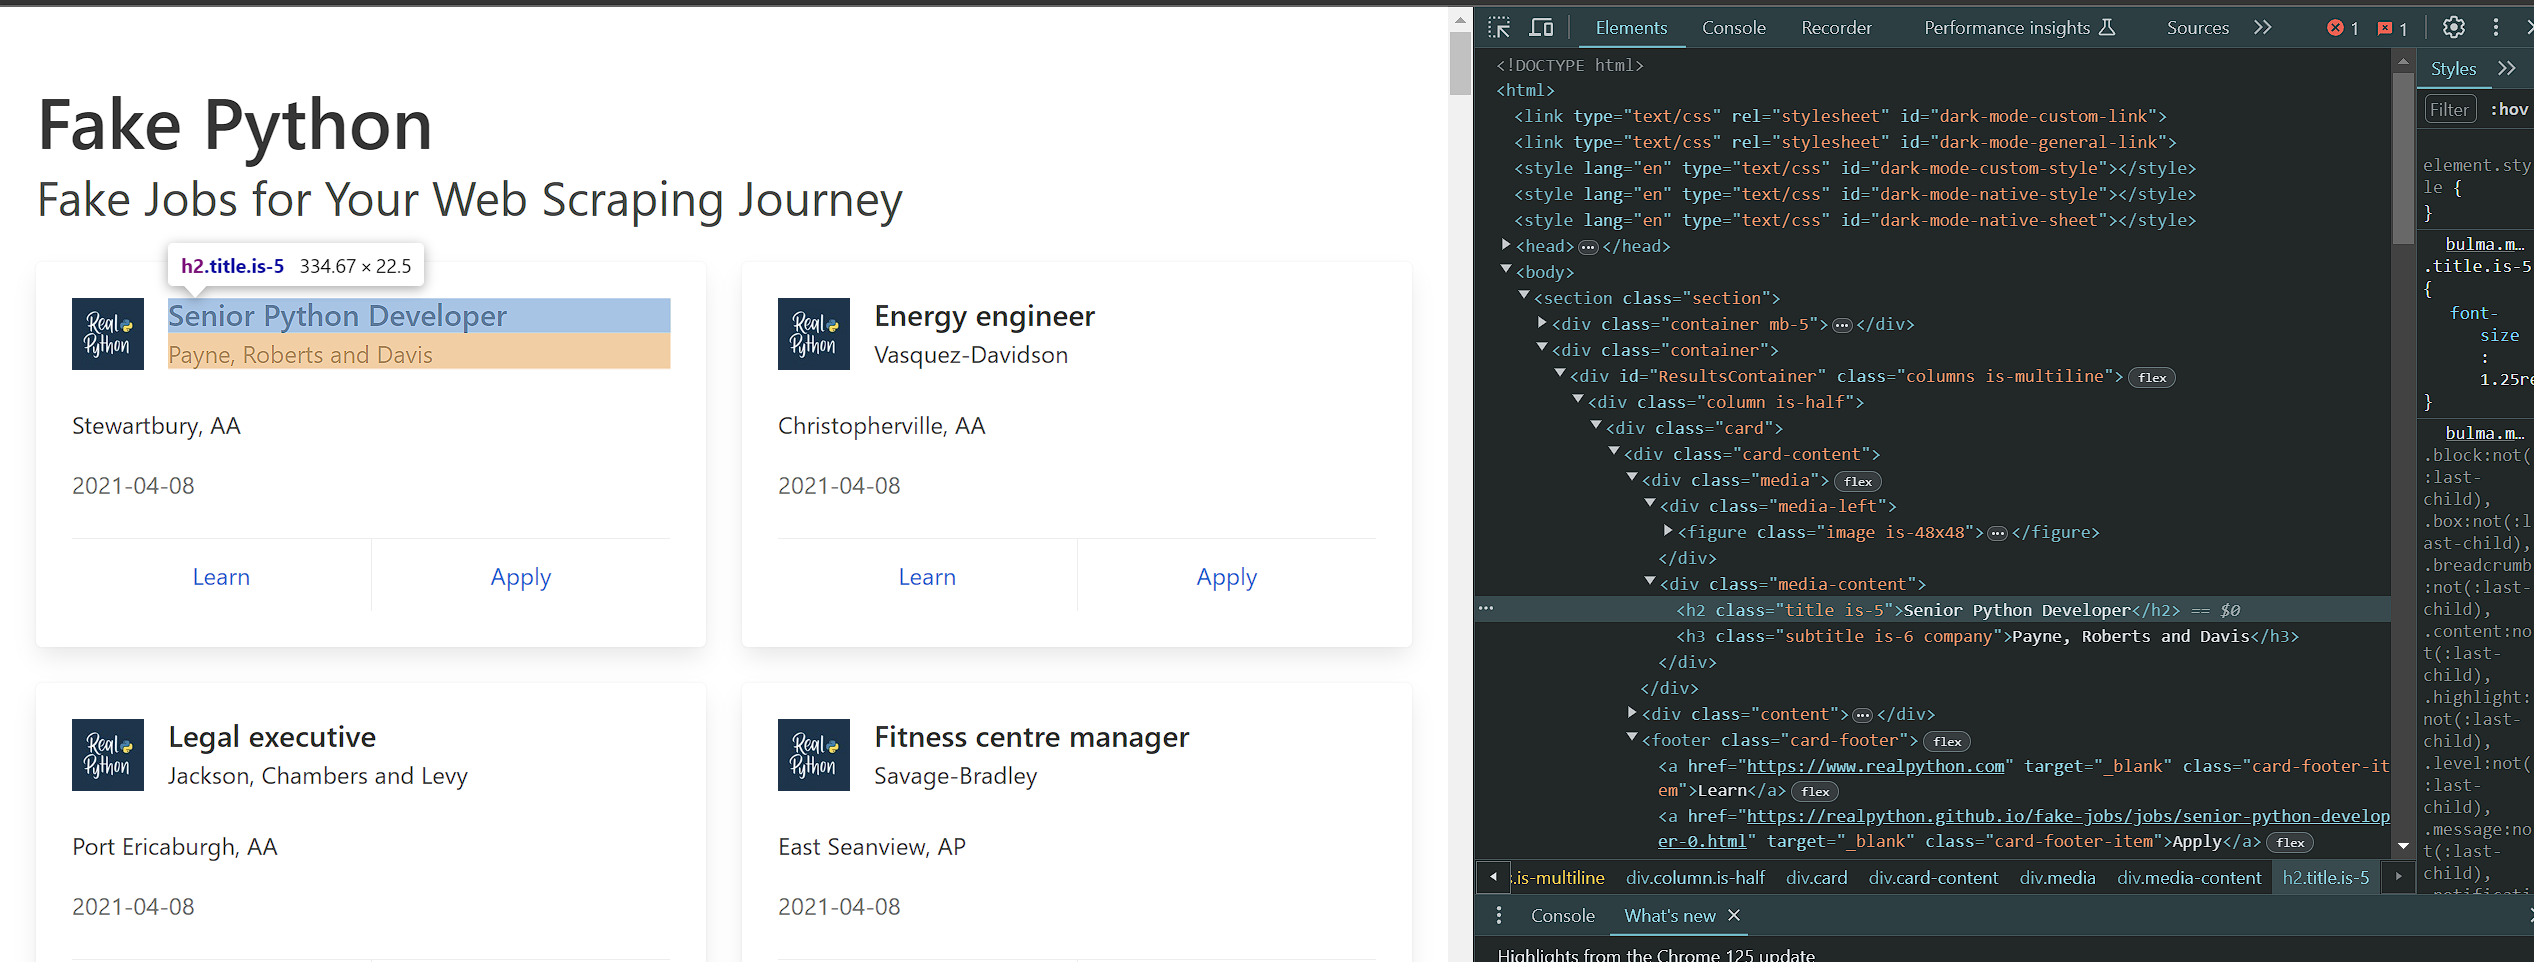

We previously saw that we can fetch all the h2 HTML tags but can we do that more efficiently?



In [ ]:
# Fetch the webpage
url = 'https://realpython.github.io/fake-jobs/'
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')
job_titles = soup.find_all('h2', class_='title is-5')  # Find all <h2> tags with class 'title is-5'
job_titles

[<h2 class="title is-5">Senior Python Developer</h2>,
 <h2 class="title is-5">Energy engineer</h2>,
 <h2 class="title is-5">Legal executive</h2>,
 <h2 class="title is-5">Fitness centre manager</h2>,
 <h2 class="title is-5">Product manager</h2>,
 <h2 class="title is-5">Medical technical officer</h2>,
 <h2 class="title is-5">Physiological scientist</h2>,
 <h2 class="title is-5">Textile designer</h2>,
 <h2 class="title is-5">Television floor manager</h2>,
 <h2 class="title is-5">Waste management officer</h2>,
 <h2 class="title is-5">Software Engineer (Python)</h2>,
 <h2 class="title is-5">Interpreter</h2>,
 <h2 class="title is-5">Architect</h2>,
 <h2 class="title is-5">Meteorologist</h2>,
 <h2 class="title is-5">Audiological scientist</h2>,
 <h2 class="title is-5">English as a second language teacher</h2>,
 <h2 class="title is-5">Surgeon</h2>,
 <h2 class="title is-5">Equities trader</h2>,
 <h2 class="title is-5">Newspaper journalist</h2>,
 <h2 class="title is-5">Materials engineer</h2>,
 

In [ ]:
for job in job_titles:
    print(job.text)

Senior Python Developer
Energy engineer
Legal executive
Fitness centre manager
Product manager
Medical technical officer
Physiological scientist
Textile designer
Television floor manager
Waste management officer
Software Engineer (Python)
Interpreter
Architect
Meteorologist
Audiological scientist
English as a second language teacher
Surgeon
Equities trader
Newspaper journalist
Materials engineer
Python Programmer (Entry-Level)
Product/process development scientist
Scientist, research (maths)
Ecologist
Materials engineer
Historic buildings inspector/conservation officer
Data scientist
Psychiatrist
Structural engineer
Immigration officer
Python Programmer (Entry-Level)
Neurosurgeon
Broadcast engineer
Make
Nurse, adult
Air broker
Editor, film/video
Production assistant, radio
Engineer, communications
Sales executive
Software Developer (Python)
Futures trader
Tour manager
Cytogeneticist
Designer, multimedia
Trade union research officer
Chemist, analytical
Programmer, multimedia
Engineer, b

Now let's get the location of these jobs:

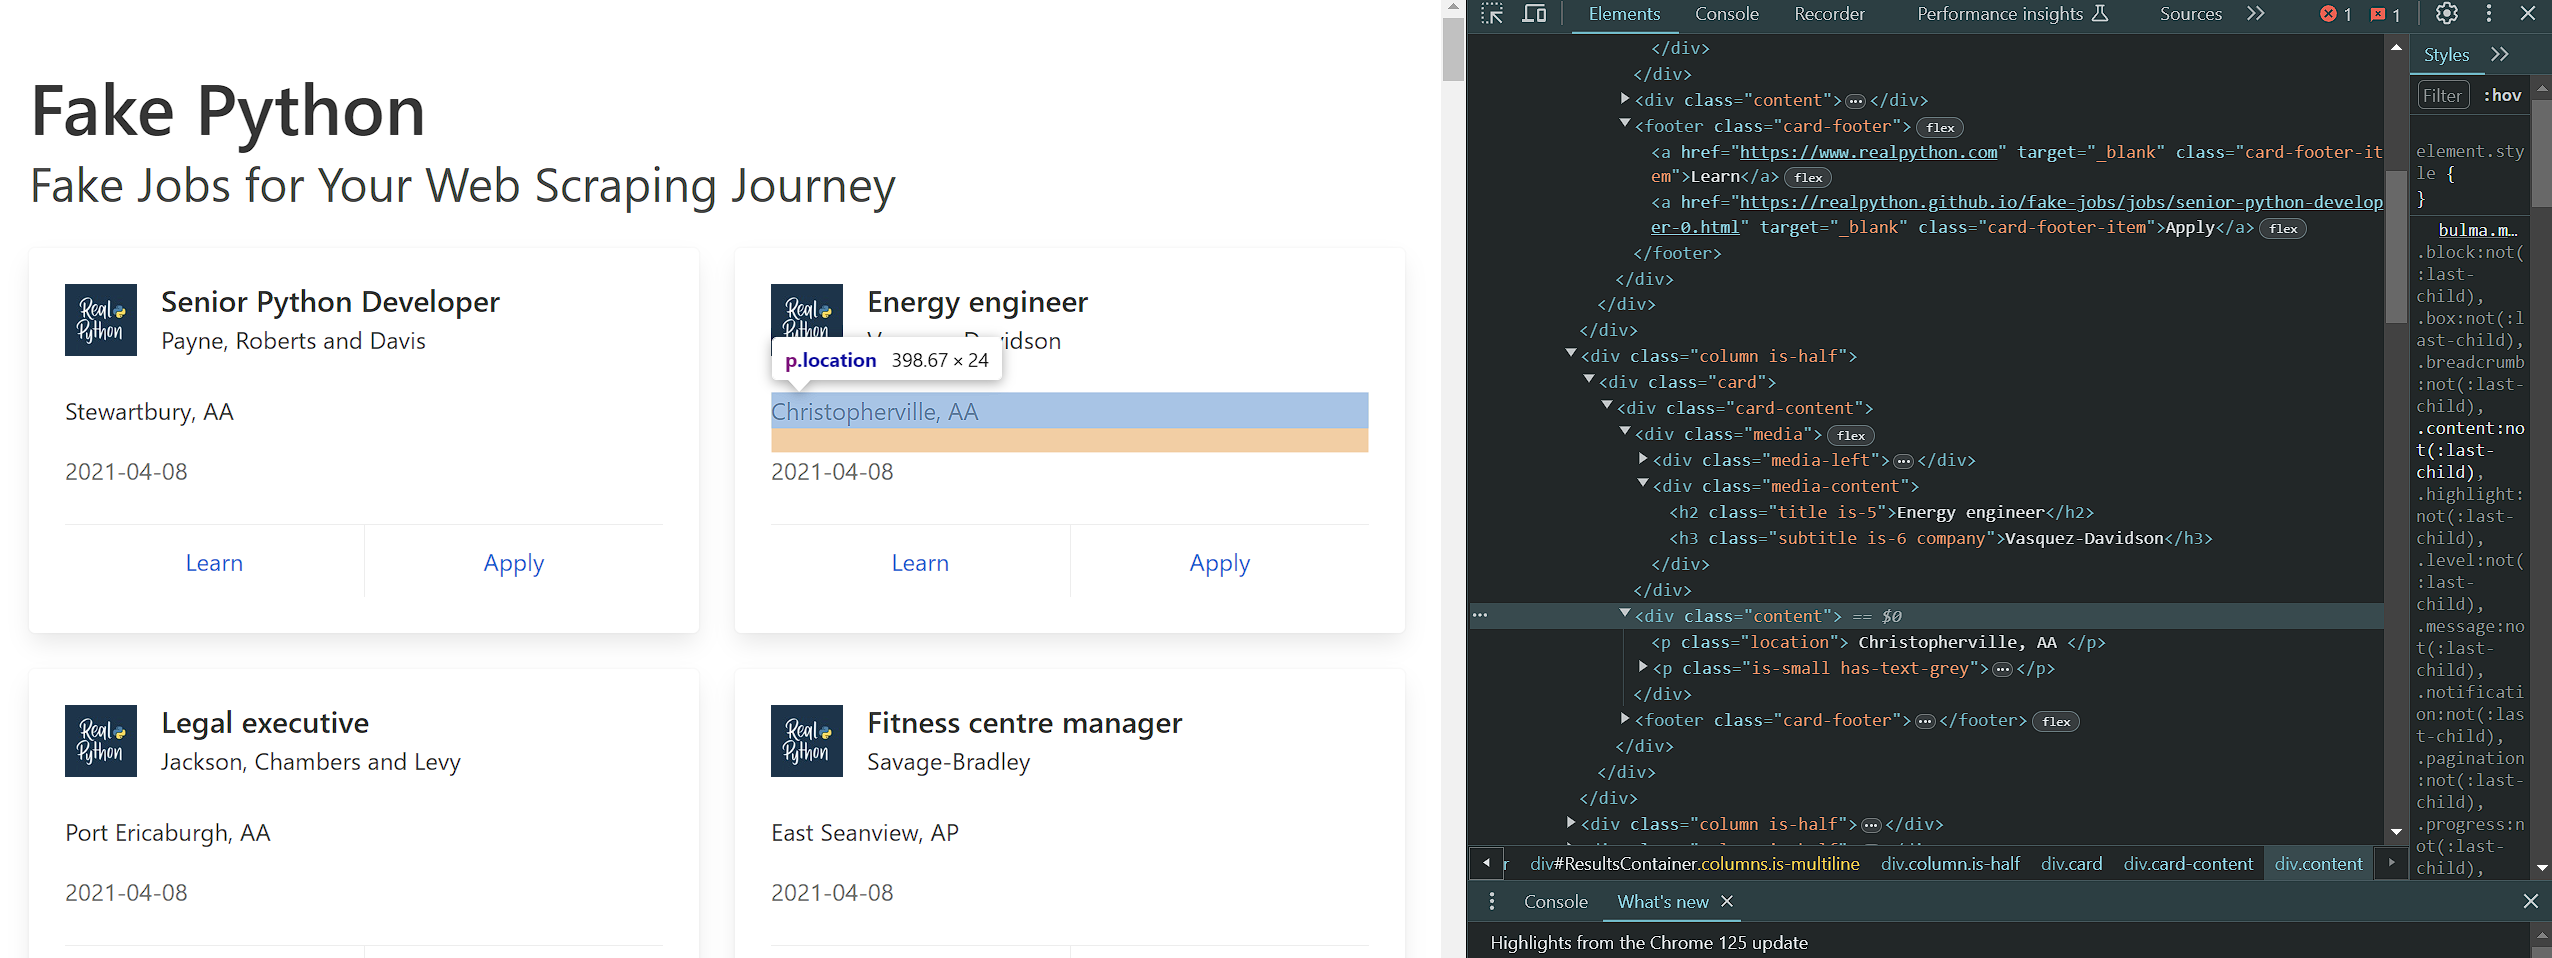

In [ ]:
job_locations = soup.find_all('p', class_='location')  # Find all <p> tags with class 'location'
job_locations

[<p class="location">
         Stewartbury, AA
       </p>,
 <p class="location">
         Christopherville, AA
       </p>,
 <p class="location">
         Port Ericaburgh, AA
       </p>,
 <p class="location">
         East Seanview, AP
       </p>,
 <p class="location">
         North Jamieview, AP
       </p>,
 <p class="location">
         Davidville, AP
       </p>,
 <p class="location">
         South Christopher, AE
       </p>,
 <p class="location">
         Port Jonathan, AE
       </p>,
 <p class="location">
         Osbornetown, AE
       </p>,
 <p class="location">
         Scotttown, AP
       </p>,
 <p class="location">
         Ericberg, AE
       </p>,
 <p class="location">
         Ramireztown, AE
       </p>,
 <p class="location">
         Figueroaview, AA
       </p>,
 <p class="location">
         Kelseystad, AA
       </p>,
 <p class="location">
         Williamsburgh, AE
       </p>,
 <p class="location">
         Mitchellburgh, AE
       </p>,
 <p class="location

In [ ]:
for location in job_locations:
    print(location.text.strip())

Stewartbury, AA
Christopherville, AA
Port Ericaburgh, AA
East Seanview, AP
North Jamieview, AP
Davidville, AP
South Christopher, AE
Port Jonathan, AE
Osbornetown, AE
Scotttown, AP
Ericberg, AE
Ramireztown, AE
Figueroaview, AA
Kelseystad, AA
Williamsburgh, AE
Mitchellburgh, AE
West Jessicabury, AA
Maloneshire, AE
Johnsonton, AA
South Davidtown, AP
Port Sara, AE
Marktown, AA
Laurenland, AE
Lauraton, AP
South Tammyberg, AP
North Brandonville, AP
Port Robertfurt, AA
Burnettbury, AE
Herbertside, AA
Christopherport, AP
West Victor, AE
Port Aaron, AP
Loribury, AA
Angelastad, AP
Larrytown, AE
West Colin, AP
West Stephanie, AP
Laurentown, AP
Wrightberg, AP
Alberttown, AE
Brockburgh, AE
North Jason, AE
Arnoldhaven, AE
Lake Destiny, AP
South Timothyburgh, AP
New Jimmyton, AE
New Lucasbury, AP
Port Cory, AE
Gileston, AA
Cindyshire, AA
East Michaelfort, AA
Joybury, AE
Emmatown, AE
Colehaven, AP
Port Coryton, AE
Amyborough, AA
Reynoldsville, AA
Port Billy, AP
Adamburgh, AA
Wilsonmouth, AA
South Kimb

Looks like we're getting the hang of it. Let's consolidate all the updates into a more sophisticated version of the code:

In [ ]:
job_cards = soup.find_all('div', class_='card')  # Find all <div> tags with class 'card' aka getting all the cards
jobs = []

for card in job_cards:
    job = card.find('h2', class_='title is-5').text
    location = card.find('p', class_='location').text.strip()
    company = card.find('h3', class_='subtitle is-6 company').text
    about = card.find_all('a', class_='card-footer-item')[0]["href"]
    apply = card.find_all('a', class_='card-footer-item')[1]["href"]
    jobs.append({"job": job, "location": location, "company": company, "about": about, "apply": apply})

In [ ]:
jobs

[{'job': 'Senior Python Developer',
  'location': 'Stewartbury, AA',
  'company': 'Payne, Roberts and Davis',
  'about': 'https://www.realpython.com',
  'apply': 'https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html'},
 {'job': 'Energy engineer',
  'location': 'Christopherville, AA',
  'company': 'Vasquez-Davidson',
  'about': 'https://www.realpython.com',
  'apply': 'https://realpython.github.io/fake-jobs/jobs/energy-engineer-1.html'},
 {'job': 'Legal executive',
  'location': 'Port Ericaburgh, AA',
  'company': 'Jackson, Chambers and Levy',
  'about': 'https://www.realpython.com',
  'apply': 'https://realpython.github.io/fake-jobs/jobs/legal-executive-2.html'},
 {'job': 'Fitness centre manager',
  'location': 'East Seanview, AP',
  'company': 'Savage-Bradley',
  'about': 'https://www.realpython.com',
  'apply': 'https://realpython.github.io/fake-jobs/jobs/fitness-centre-manager-3.html'},
 {'job': 'Product manager',
  'location': 'North Jamieview, AP',
  'company

Looks like a success! We got to save all the needed information in a dedicated list. Now all is left is to convert the data to a dataframe, save it in a csv and export it to our computer.

## Storing Data and CSV Exporting

In [ ]:
# Convert to DataFrame
jobs_df = pd.DataFrame(jobs)
jobs_df

,job,location,company,about,apply
0,Senior Python Developer,"Stewartbury, AA","Payne, Roberts and Davis",https://www.realpython.com,https://realpython.github.io/fake-jobs/jobs/se...
1,Energy engineer,"Christopherville, AA",Vasquez-Davidson,https://www.realpython.com,https://realpython.github.io/fake-jobs/jobs/en...
2,Legal executive,"Port Ericaburgh, AA","Jackson, Chambers and Levy",https://www.realpython.com,https://realpython.github.io/fake-jobs/jobs/le...
3,Fitness centre manager,"East Seanview, AP",Savage-Bradley,https://www.realpython.com,https://realpython.github.io/fake-jobs/jobs/fi...
4,Product manager,"North Jamieview, AP",Ramirez Inc,https://www.realpython.com,https://realpython.github.io/fake-jobs/jobs/pr...
...,...,...,...,...,...
95,Museum/gallery exhibitions officer,"Lake Abigail, AE","Nguyen, Yoder and Petty",https://www.realpython.com,https://realpython.github.io/fake-jobs/jobs/mu...
96,"Radiographer, diagnostic","Jacobshire, AP",Holder LLC,https://www.realpython.com,https://realpython.github.io/fake-jobs/jobs/ra...
97,Database administrator,"Port Susan, AE",Yates-Ferguson,https://www.realpython.com,https://realpython.github.io/fake-jobs/jobs/da...
98,Furniture designer,"North Tiffany, AA",Ortega-Lawrence,https://www.realpython.com,https://realpython.github.io/fake-jobs/jobs/fu...


After saving all the data in a dedicated dataframe now we can convert it to a CSV file and download it to our computer:

In [ ]:
# Import the files module from google.colab to handle file uploads and downloads
from google.colab import files

# Save to CSV
csv_file_path = "jobs.csv"
jobs_df.to_csv(csv_file_path, index=False)
files.download(csv_file_path)
print(f"The file '{csv_file_path}' has been downloaded.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The file: jobs.csv has been downloaded.


Success! For easy copying and further exploration, we have included the complete final code below:

## Full Fake Jobs Web Scraping

In [ ]:
# Importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Import the files module from google.colab to handle file uploads and downloads
from google.colab import files

# Fetch the webpage
url = 'https://realpython.github.io/fake-jobs/'
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Get all the job cards
job_cards = soup.find_all('div', class_='card')  # Find all <div> tags with class 'card' aka getting all the cards
jobs = []

# Save to a list each job with its data
for card in job_cards:
    job = card.find('h2', class_='title is-5').text
    location = card.find('p', class_='location').text.strip()
    company = card.find('h3', class_='subtitle is-6 company').text
    about = card.find_all('a', class_='card-footer-item')[0]["href"]
    apply = card.find_all('a', class_='card-footer-item')[1]["href"]
    jobs.append({"job": job, "location": location, "company": company, "about": about, "apply": apply})

# Convert to DataFrame
jobs_df = pd.DataFrame(jobs)

# Save to CSV
csv_file_path = "jobs.csv"
jobs_df.to_csv(csv_file_path, index=False)
files.download(csv_file_path)
print(f"The file '{csv_file_path}' has been downloaded.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The file 'jobs.csv' has been downloaded.


There is still much more to learn, but since this is a beginner's guide, we'll keep it simple and let you explore further on your own :)


## Practice On Your Own
To practice on your own, you can try to extract all the movies from IMDBs webpage containing the top 250 movies of all time:<br>
https://www.imdb.com/chart/top/

## Final Scraping Thoughts


When diving deeper into web scraping, here are some advanced topics to consider:

---

1. **Web Scraping Dynamic Content**:
   - **Selenium**: Learn to use Selenium for web scraping dynamic content that requires JavaScript execution.
   - **Playwright**: Explore Playwright, a newer tool for automating web scraping with support for multiple browsers.

2. **Handling Complex HTML Structures**:
   - **XPath**: Learn to use XPath expressions to navigate and select elements in complex HTML documents.
   - **CSS Selectors**: Master CSS selectors for more precise and efficient element selection.

3. **Managing Large-Scale Scraping**:
   - **Concurrency and Parallelism**: Use frameworks like Scrapy or asyncio to scrape multiple pages concurrently.
   - **Rate Limiting**: Implement rate limiting to avoid overwhelming websites and getting banned.

4. **Data Storage and Management**:
   - **Databases**: Store scraped data in databases like SQLite, PostgreSQL, or MongoDB for better organization and retrieval.
   - **Data Cleaning and Transformation**: Use pandas for cleaning and transforming scraped data into usable formats.

5. **Handling Anti-Scraping Measures**:
   - **Rotating Proxies**: Implement rotating proxies to avoid IP bans and ensure continuous scraping.
   - **User-Agent Spoofing**: Rotate user-agent strings to mimic different browsers and avoid detection.

6. **Legal and Ethical Considerations**:
   - **Terms of Service**: Familiarize yourself with the legal aspects of web scraping, including compliance with website terms of service.
   - **Ethical Scraping**: Practice ethical scraping by respecting site usage and data privacy policies.

By exploring these advanced topics, you'll be well-equipped to tackle a wide range of web scraping challenges and make the most of the data you collect.

Now that we have learned about web scraping, we understand how to extract data directly from web pages by parsing the HTML content. While web scraping is a powerful technique, it has its limitations and challenges. Websites can change their structure, making our scrapers break. Additionally, scraping can be slow and resource-intensive, and some websites have measures to block scrapers. This is where APIs come into play:

# APIs



### What is an API?

An API (Application Programming Interface) is a set of rules and protocols that allows different software applications to communicate with each other. APIs provide a way for developers to interact with an external service using a predefined set of commands.



### Non-Technical Analogy

To understand APIs better before diving into this world, let's use an analogy from a non-technical perspective:

Imagine you are at a restaurant. Instead of going into the kitchen to prepare your own meal (which could be messy and confusing), you interact with the customer service staff. You look at the menu, decide what you want, and place your order with them. They take your request, relay it to the kitchen, and then deliver the prepared meal to your table.

In the digital world, APIs work in a similar way. When you need specific data from a website, instead of "going into the kitchen" (i.e., scraping the website and dealing with the messy HTML), you send a request to the API. The API processes your request, retrieves the needed data from the server, and delivers it back to you in a clean, structured format like JSON or XML.

Just like customer service makes your dining experience smoother and more efficient, APIs make data retrieval simpler and more reliable.

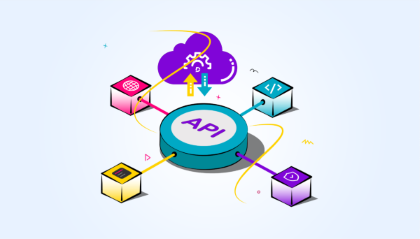

## Key components of an API
To successfully execute an API, the following components are needed:

### API client

An API client can be triggered by a user action, like clicking a button, or by an external event from an application. It simplifies user interactions by managing the complex backend processes.

Imagine a weather application on your smartphone. When you open the app and tap on the "Update Weather" button, the app (acting as the API client) sends a request to a weather service API.

### API key
**TODO** add about autantication

A unique passcode containing letters and numbers that grants access to an API.<br>
For example: <br>
api_key = '12345abcde67890fghij'

### API requests
An API request is a message sent to an application asking a server for information or a service. The Representational State Transfer (REST) APIs are commonly used, so we’ll discuss what is involved in a REST API request. <br>
The sub-components or parameters that make up an API requests are:

#### Endpoint
An endpoint is a specific URL that identifies the location of a resource on a server. The API endpoint allows different systems and applications to communicate by sending and receiving information with instructions.


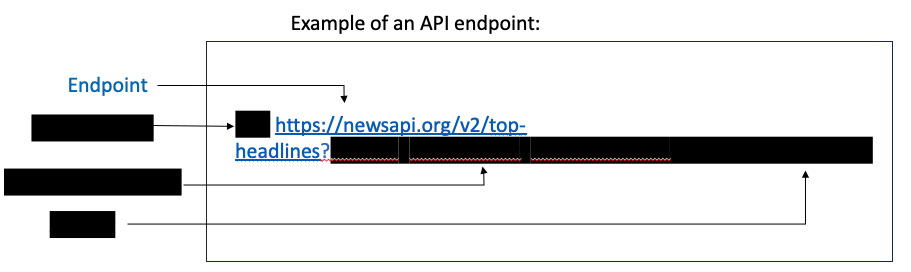

#### Request method

The request methods are the specific operations the client wants to perform on the URL resource. <br>
REST API uses the HTTP (Hypertext Transfer Protocol - essential for web data communication) method  that can perform the following actions:

*   **GET** – retrieves data from a server;


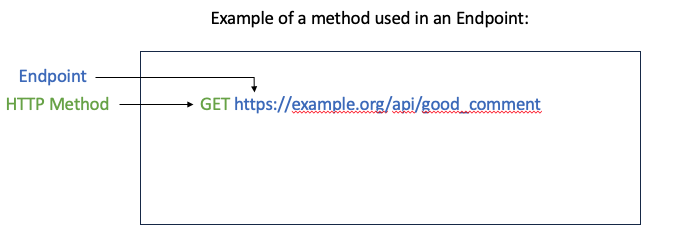

*   **POST** – adds new data saved to a URL resource on a server;



   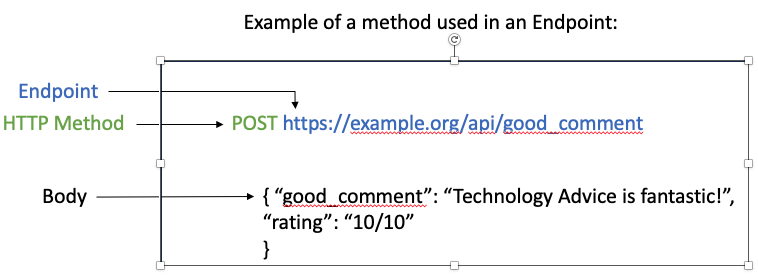

In this example, the good_comment phrase in the Body field will be posted as a new comment in the URL resource.

*   **PUT** – replaces an entire resource with new information
*   **PATCH** – is used to partially update an existing URL resource with additional information
*   **DELETE** – used to remove data from a database







#### Parameters

Parameters are the variables passed to an API endpoint to provide explicit instructions for the API server to process. The parameters can be included as part of the API request in the URL query string or in the request body field. <br>
Notice how the parameters are included in the HTTP endpoint URL sent to an API server on a web server:


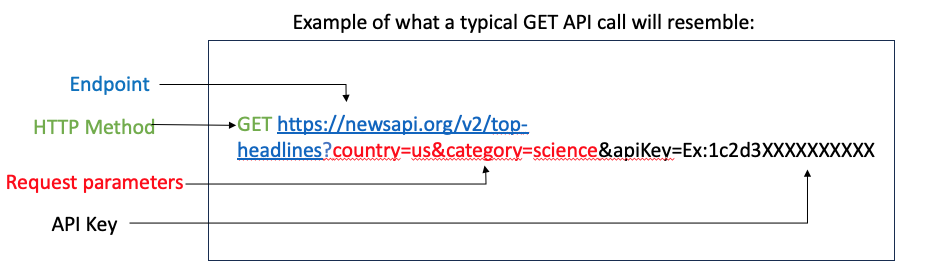

#### Request headers

Request headers are essential pieces of information included in the message body that help servers process requests effectively. They typically include:

- **Data Format**: Specifies how data will be sent, such as JSON (JavaScript Object Notation).
- **API Version**: Identifies the version of the API being called.
- **API Key**: Provides authentication credentials to access the API.
- **Request Behavior**: Directs the server on how to handle the request.
- **Metadata**: Offers additional information about the request or response.
- **Request Method**: Describes the HTTP method used (e.g., GET, POST, PUT, DELETE).
- **Content Type**: Indicates the type of data being sent in the request payload.

These headers play a crucial role in facilitating smooth communication between clients and servers in API interactions.

#### API server

The API server is software installed on a server, positioned between the client and the data source. When an API client generates a request, it is directed to the designated endpoint on the API server for processing. The API server manages authentication, validates input data, retrieves or modifies information from a database, and then sends back the correct response to the client.

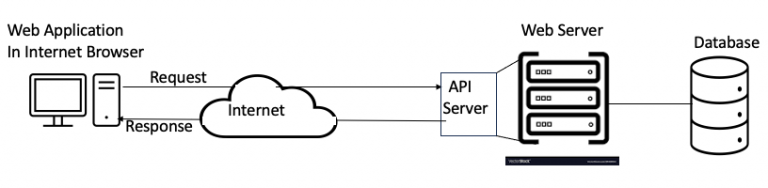

#### API response

TODO add that most of the responses are passed as JSON formats + Explain about JSON with example.

The API server generates the API response that returns to the API client. The API response can respond in multiple ways depending on what was in the API request. <br>
An API response provides the following information:

##### JSON
TODO - explain + example

##### Status code

The status code communicates the outcome of an API request to the client. It provides clarity on the request's result: a 200 code means the server successfully returned requested data, 201 indicates a new resource creation, and 404 signals that the requested resource was not found on the server.

##### Response headers
Response headers provide additional information from the server to the client. They include metadata, directives, and other important details.

    Example:
    HTTP/1.1 200 OK
    Date: Fri, 17 Jun 2024 12:00:00 GMT
    Server: Apache <br>
    Content-Type: application/json

#### Body

The response body contains data sent back by the API server in response to the client's request. It usually includes structured data objects representing requested resources, along with metadata or an error message if the request was unsuccessful.

    {
    "id": 1,
    "name": "John Doe",
    "email": "johndoe@example.com",
    "age": 30,
    "status": "active"
    }

In this example, the response body is a JSON object containing information about a user. The fields include id, name, email, age, and status, which represent the requested resource's data.

### More types of APIs

- **GraphQL APIs**: <br>
GraphQL is an open-source query language that allows clients to request specific data through an API. Developers use its syntax to ask for data from multiple sources, and the server responds with the data in the exact structure requested. (reed more: https://www.techtarget.com/searchapparchitecture/definition/GraphQL)

- **SOAP**: <br>
SOAP is a structured API that uses XML for messaging. It's strict and only uses XML, unlike REST, which supports XML, JSON, plain text, and HTML. REST APIs are faster because they use smaller messages and caching. SOAP, on the other hand, is slower due to its rigid rules. Despite this, SOAP is highly secure, making it preferred for online banking and financial institutions.
(reed more: https://shorturl.at/ymOb3)



### Tools and Libraries for API Interaction

Interacting with APIs typically involves making HTTP requests, as most web APIs are built on the HTTP protocol. This allows developers to perform operations such as retrieving data, sending data, and executing functions on remote servers. There are various ways to make HTTP requests, each with its own tools and methods:

### 1. **Command-Line Tools**

- cURL: A powerful command-line tool that supports a variety of protocols including HTTP, HTTPS, FTP, and more.

### 2. **Code Libraries**

#### <u>Python</u>
- **requests**: A user-friendly library for making HTTP requests in Python.

#### <u>JavaScript</u>
- **fetch**: a built-in browser API for making HTTP requests
- **axios**: a popular third-party library with more features.

#### <u>Java</u>
- **HttpURLConnection, OkHttp, Apache HttpClient**: Various libraries available for making HTTP requests in Java.

#### <u>C#</u>
- **HttpClient, RestSharp**: Libraries for making HTTP requests in C#.


### 3. **Frameworks and Tools**

- **Postman**: A graphical tool for testing APIs.

- **Swagger** / **OpenAPI** : Tools and standards for documenting and interacting with APIs.




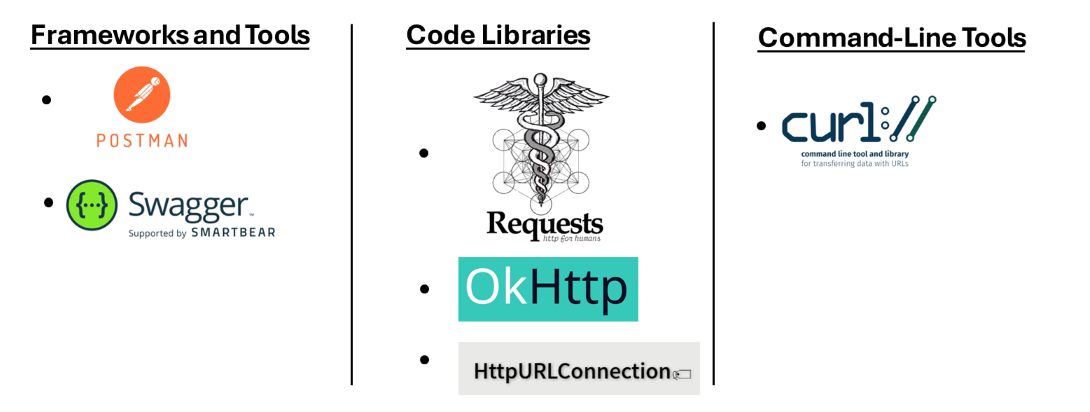

After understanding the basics of APIs, let's explore some practical examples to gain a better understanding. We'll use the **<u>requests</u>** library in Python for these examples because it's user-friendly and perfect for beginners.

## Working with example

TODO explain

### Requests Library

TODO Explain, maybe remove install since it is in webscraping...

In [ ]:
!pip install requests

In [ ]:
import requests

### Making GET request

TODO explain

In [ ]:
# The API endpoint
url = "https://jsonplaceholder.typicode.com/posts/1"

# A GET request to the API
response = requests.get(url)

# Print the response
response_json = response.json()
print(response_json)


{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}


### 200 Status Code

In [ ]:
# Print status code from original response (not JSON)
print(response.status_code)

200


### Making POST request

TODO Explain

In [ ]:
# Define new data to create
new_data = {
    "userID": 1,
    "id": 1,
    "title": "Making a POST request",
    "body": "This is the data we created."
}

# The API endpoint to communicate with
url_post = "https://jsonplaceholder.typicode.com/posts"

# A POST request to tthe API
post_response = requests.post(url_post, json=new_data)

# Print the response
post_response_json = post_response.json()
print(post_response_json)

{'userID': 1, 'id': 101, 'title': 'Making a POST request', 'body': 'This is the data we created.'}


### 201 Status Code

In [ ]:
# Print status code from original response (not JSON)
print(post_response.status_code)

201


## Authenticating requests

TODO Explain

In [ ]:
from requests.auth import HTTPBasicAuth

private_url = "https://api.github.com/user"
github_username = "username"
token = "token"

private_url_response = requests.get(
    url=private_url,
    auth=HTTPBasicAuth(github_username, token)
)

private_url_response.status_code


401

An example of another way to work with api keys:

```python
import requests

# Define the URL and API key
url = "https://api.example.com/data"
api_key = "YOUR_API_KEY_HERE"

# Make the GET request with the API key as a query parameter
response = requests.get(url, params={"api_key": api_key})

# Check the response status and print the result
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}, {response.text}")

```

## Pagination and Rate Limiting

TODO maybe delete

Many APIs paginate their responses to limit the amount of data returned in a single request. Here's how to handle pagination.



In [ ]:
# Initialize parameters
url = 'https://api.example.com/data'
params = {'key': 'your_api_key', 'query': 'example', 'page': 1}

# Loop to handle pagination
all_data = []
while True:
    response = requests.get(url, params=params)
    if response.status_code != 200:
        break

    data = response.json()
    all_data.extend(data['items'])

    # Check for next page
    if 'next_page' in data:
        params['page'] += 1
    else:
        break

print(f'Total items fetched: {len(all_data)}')


In [ ]:
import requests
import time

# Define the URL and API key
url = "https://api.example.com/data"
api_key = "YOUR_API_KEY_HERE"

# Set up the headers with the API key
headers = {
    "Authorization": f"Bearer {api_key}",
    "Accept": "application/json"
}

# Function to make the GET request with rate limit handling
def fetch_data_with_rate_limit(url, headers, retries=5):
    for i in range(retries):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.json()
        elif response.status_code == 429:  # HTTP status code 429 indicates too many requests
            print("Rate limit exceeded. Retrying...")
            retry_after = int(response.headers.get("Retry-After", 2**i))  # Default to exponential backoff
            time.sleep(retry_after)
        else:
            response.raise_for_status()
    raise Exception("Max retries exceeded")

# Make the GET request
try:
    data = fetch_data_with_rate_limit(url, headers)
    print(data)
except Exception as e:
    print(f"Error: {e}")

Error: HTTPSConnectionPool(host='api.example.com', port=443): Max retries exceeded with url: /data (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7d93e574fb20>: Failed to resolve 'api.example.com' ([Errno -2] Name or service not known)"))


```python
import requests
import time

# Define the URL and personal access token
url = "https://api.github.com/user/repos"
token = "YOUR_GITHUB_TOKEN_HERE"

# Set up the headers with the token
headers = {
    "Authorization": f"token {token}",
    "Accept": "application/vnd.github.v3+json"
}

# Function to make the GET request with rate limit handling
def fetch_data_with_rate_limit(url, headers, retries=5):
    for i in range(retries):
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            return response.json()
        elif response.status_code == 403 and 'X-RateLimit-Reset' in response.headers:
            reset_time = int(response.headers['X-RateLimit-Reset'])
            wait_time = max(0, reset_time - int(time.time()))
            print(f"Rate limit exceeded. Retrying in {wait_time} seconds...")
            time.sleep(wait_time)
        else:
            response.raise_for_status()
    raise Exception("Max retries exceeded")

# Make the GET request
try:
    data = fetch_data_with_rate_limit(url, headers)
    print(data)
except Exception as e:
    print(f"Error: {e}")
```

# Web Scraping Vs APIs

Now that we've explored both web scraping and APIs, it's time to compare these two methods of retrieving data from the web. Understanding the differences, advantages, and limitations of each approach will help you decide which method to use in various scenarios. Let's delve into a comparison of web scraping versus APIs.

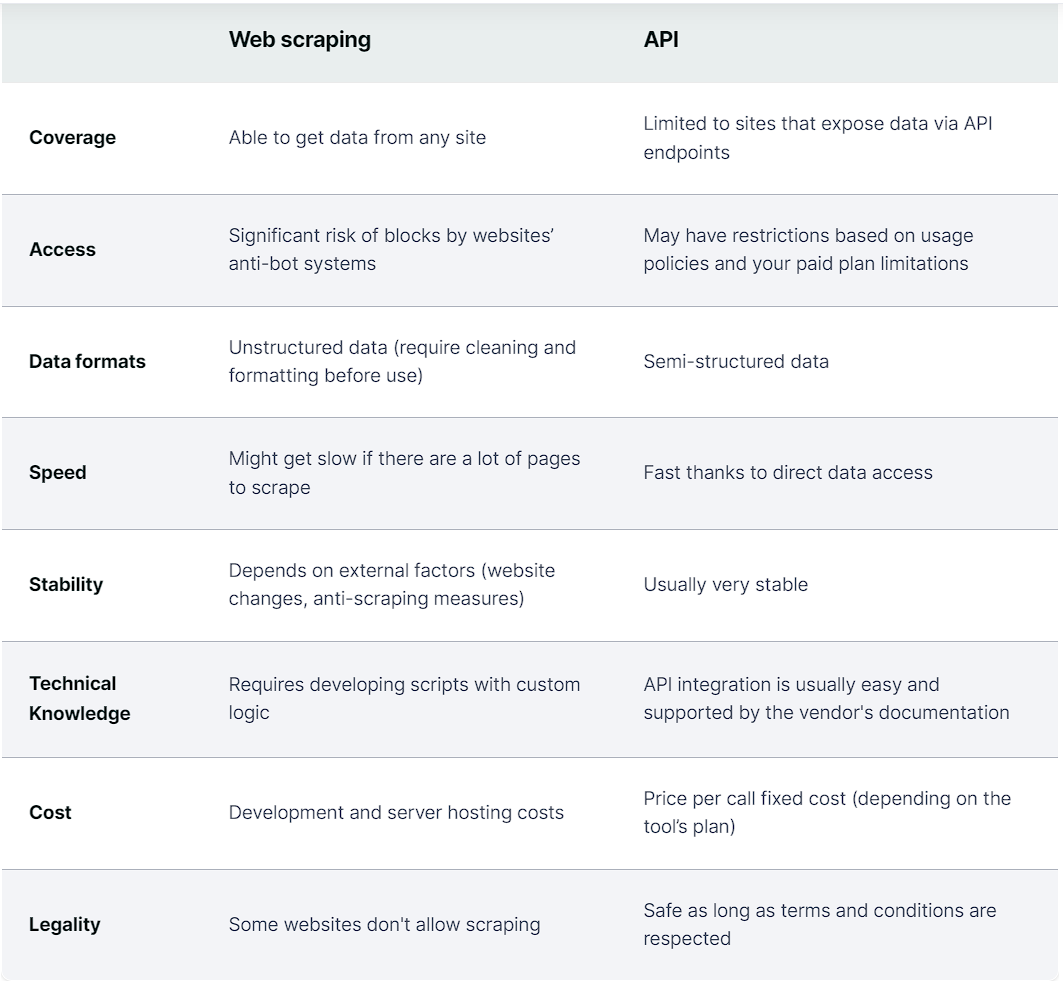

As you can see from the breakdown above, both web scraping and API calls have their pros and cons. It’s up to you to decide which aspects matter the most for your use case.<br><br>

Generally, you should use web scraping when:

- The target website doesn't offer an API, or the API doesn't provide valuable data.
- The site you want to scrape is small and doesn't have strict anti-bot systems.
<br><br>

Go with API when:

- The website provides well-documented and affordable API endpoints with access to the data you need.
- You're not limited by a tight budget.

# Bibliography

### Sites

1. ChatGPT - as the main motivator :)

2. https://realpython.com/beautiful-soup-web-scraper-python/#step-3-parse-html-code-with-beautiful-soup - Fake Job Scraping

3. https://www.datacamp.com/tutorial/making-http-requests-in-python?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720824&utm_adgroupid=157156376311&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=703052949243&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=1008000&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-row-p2_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-june24&gad_source=1&gclid=CjwKCAjwps-zBhAiEiwALwsVY - API using requests library

4. https://www.zenrows.com/blog/web-scraping-vs-api#differences-and-similarities - Web Scraping Vs APIs